Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.


Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

Column Descriptors:


**Artist**: The name of the artist, providing direct attribution to the creative mind behind the track.

**Track Name**: The title of the track, encapsulating its identity and essence.

**Popularity**: A numeric score reflecting the track's reception and appeal among Spotify listeners.

**Duration** (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

**Track ID**: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful ?

2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram .

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

In [1]:
# importing needed modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import warnings 

warnings.filterwarnings('ignore')

In [2]:
# get dataset into a Main dataframe by using pandas

main_df=pd.read_csv('spotify.csv')

In [3]:
# now make copy of main df for frature operations 

df=main_df.copy()

In [4]:
# first 5 rows of df
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [6]:
# check all details of df
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 440    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0     ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Popularity      │   0 │     0 │   75.74 │  9.887 │     29 │      70 │      77 │      83 │      97 │   ▁▅▇▃ │  │
│ │ Duration (ms)   │   0 │     0 │  206800 │  53580 │  81670 │  172800 │  201900 │  235100 │  501600 │  ▂▇▅▁  │  │
│ └─────────────────┴─────┴───────┴─────────┴────────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Artist                    │       0 │          0 │                          1.7 │                      759 │  │
│ │ Track Name                │       0 │          0 │                            4 │                     1753 │  │
│ │ Track ID                  │       0 │          0 │                            1 │                      440 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
# no null values in df

In [12]:
# 1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needful ?

# read datafeame into df
#for checking null values 
df.isnull().sum()

# no null values

# for duplicate row
df.duplicated().sum()

# got 27 duplicate rows
# Remove duplicate rows if any
df = df.drop_duplicates()


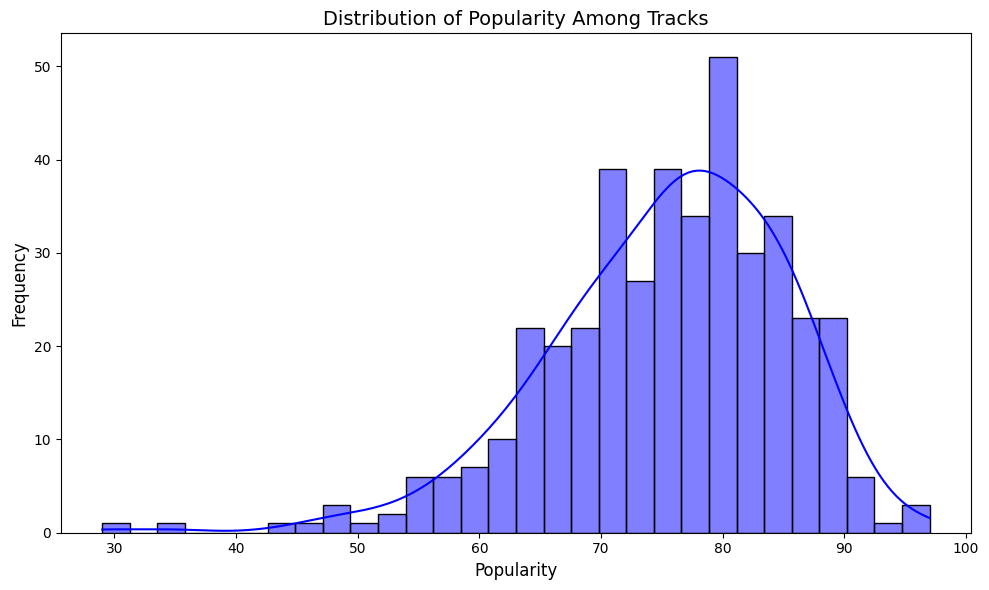

In [14]:
# 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram .

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Popularity Among Tracks', fontsize=14)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

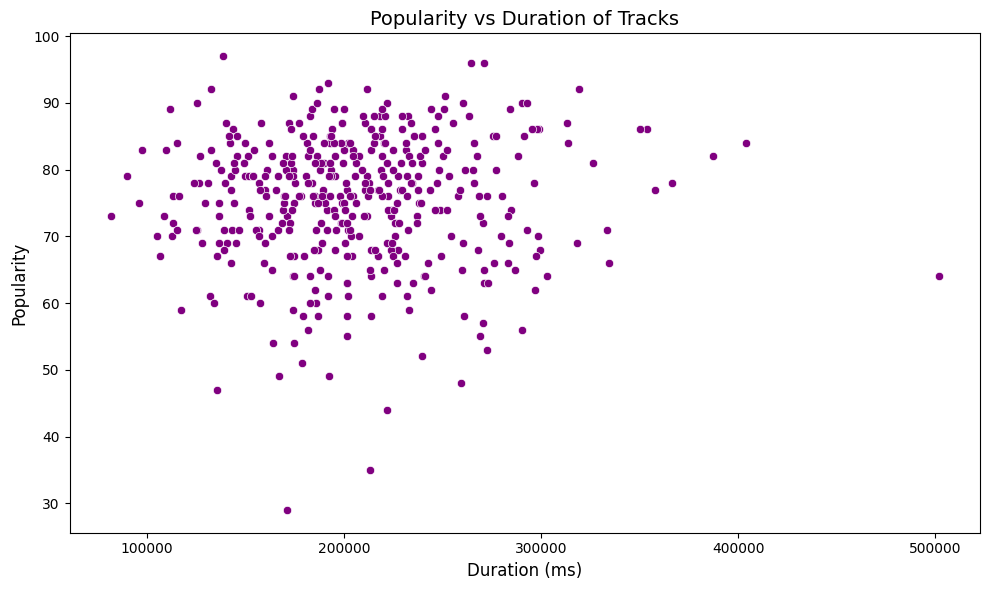

In [15]:
# 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, color='purple')
plt.title('Popularity vs Duration of Tracks', fontsize=14)
plt.xlabel('Duration (ms)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.tight_layout()
plt.show()

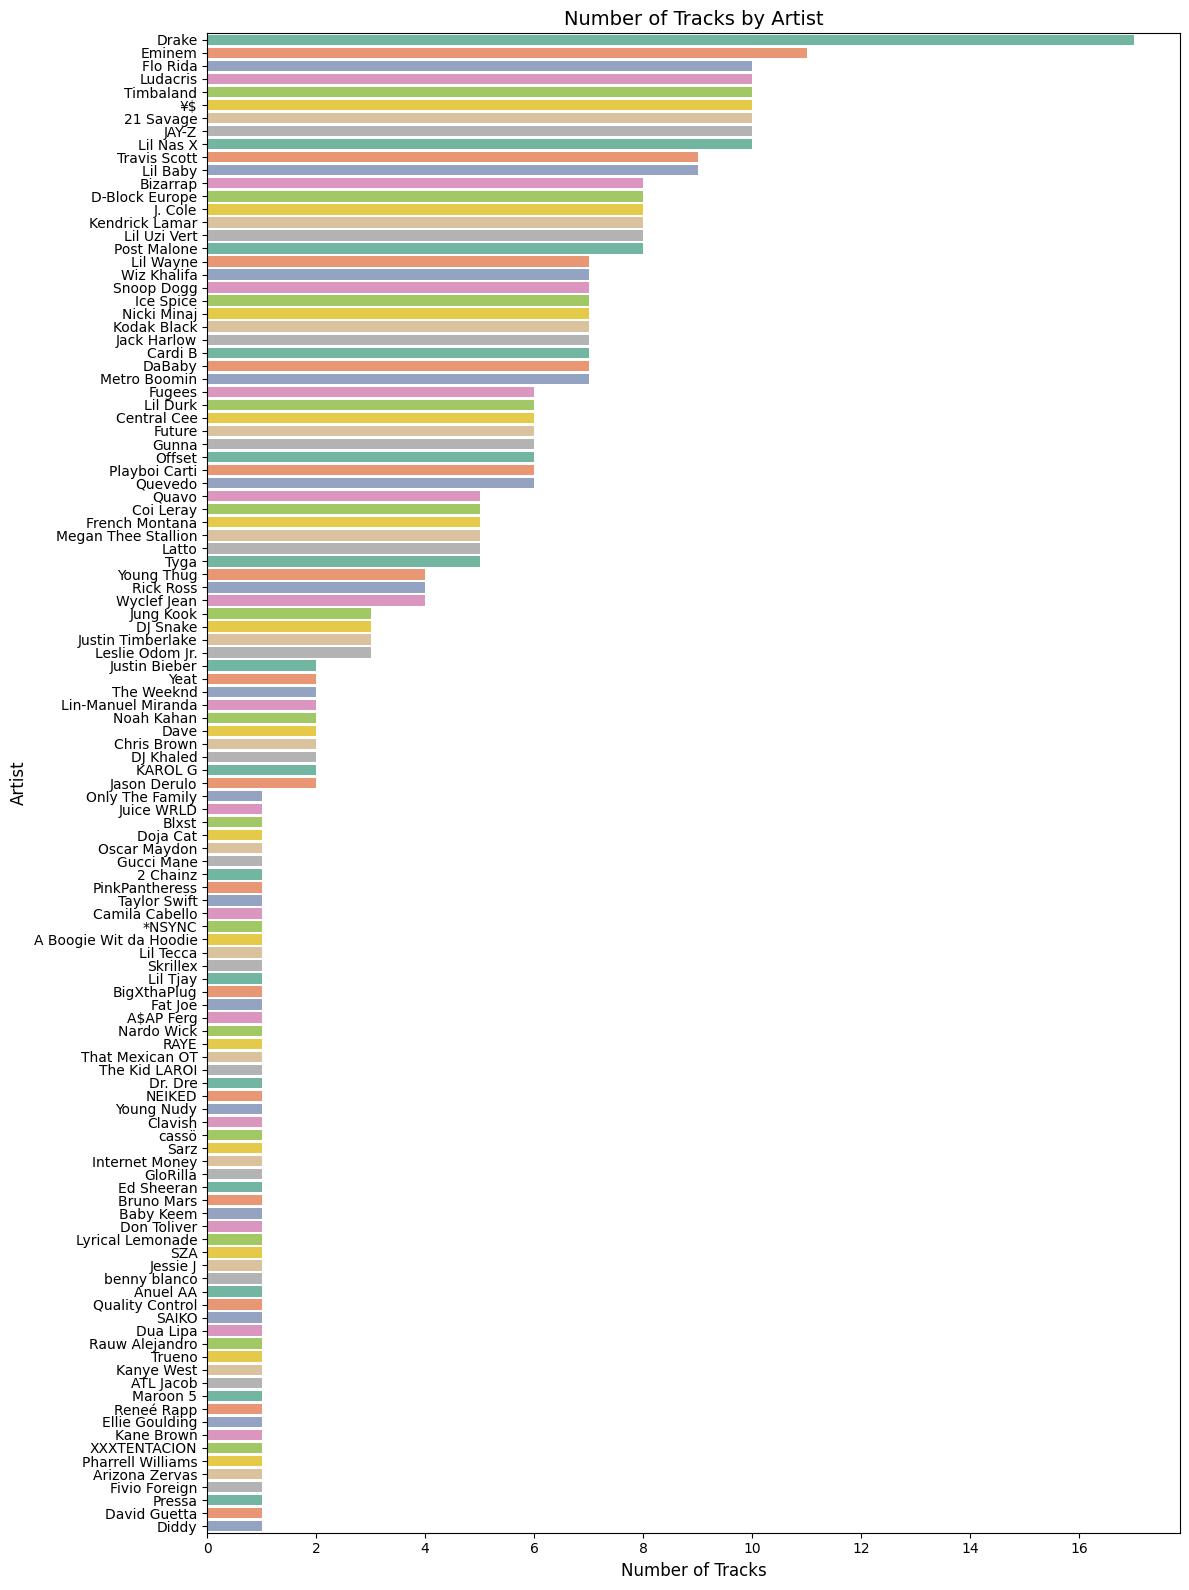

In [18]:
# 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a countplot.

plt.figure(figsize=(12, 16))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index, palette='Set2')
plt.title('Number of Tracks by Artist', fontsize=14)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
# 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]

print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [20]:
# 6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist.

top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5).reset_index()

# Display average popularity for each of the top 5 artists
print("Top 5 Most Popular Artists and their Average Popularity:")
print(top_5_artists)

Top 5 Most Popular Artists and their Average Popularity:
         Artist  Popularity
0         cassö   92.000000
1        Trueno   89.000000
2  David Guetta   87.000000
3  Travis Scott   86.555556
4            ¥$   85.100000


In [21]:
# 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

top_5_artists_names = top_5_artists['Artist']

# For each of the top 5 artists, find the most popular track
for artist in top_5_artists_names:
    top_track = df[df['Artist'] == artist].nlargest(1, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
    print(f"Most Popular Track for {artist}:")
    print(top_track)

Most Popular Track for cassö:
    Artist Track Name  Popularity
140  cassö      Prada          92
Most Popular Track for Trueno:
     Artist                    Track Name  Popularity
241  Trueno  Mamichula - con Nicki Nicole          89
Most Popular Track for David Guetta:
           Artist          Track Name  Popularity
200  David Guetta  Baby Don't Hurt Me          87
Most Popular Track for Travis Scott:
          Artist                  Track Name  Popularity
30  Travis Scott  FE!N (feat. Playboi Carti)          93
Most Popular Track for ¥$:
    Artist Track Name  Popularity
260     ¥$   CARNIVAL          96


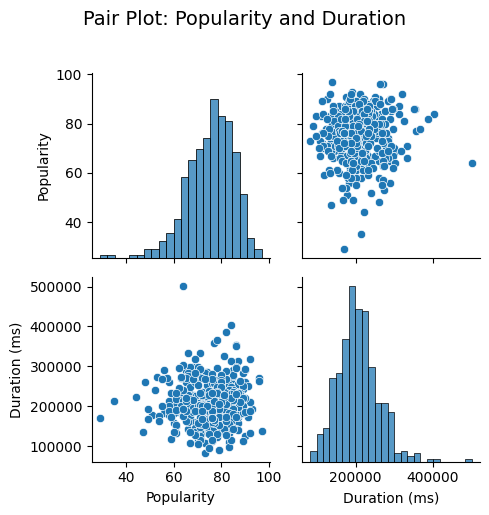

In [22]:
# 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(df[['Popularity', 'Duration (ms)']])  # You can add more columns if needed
plt.suptitle('Pair Plot: Popularity and Duration', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

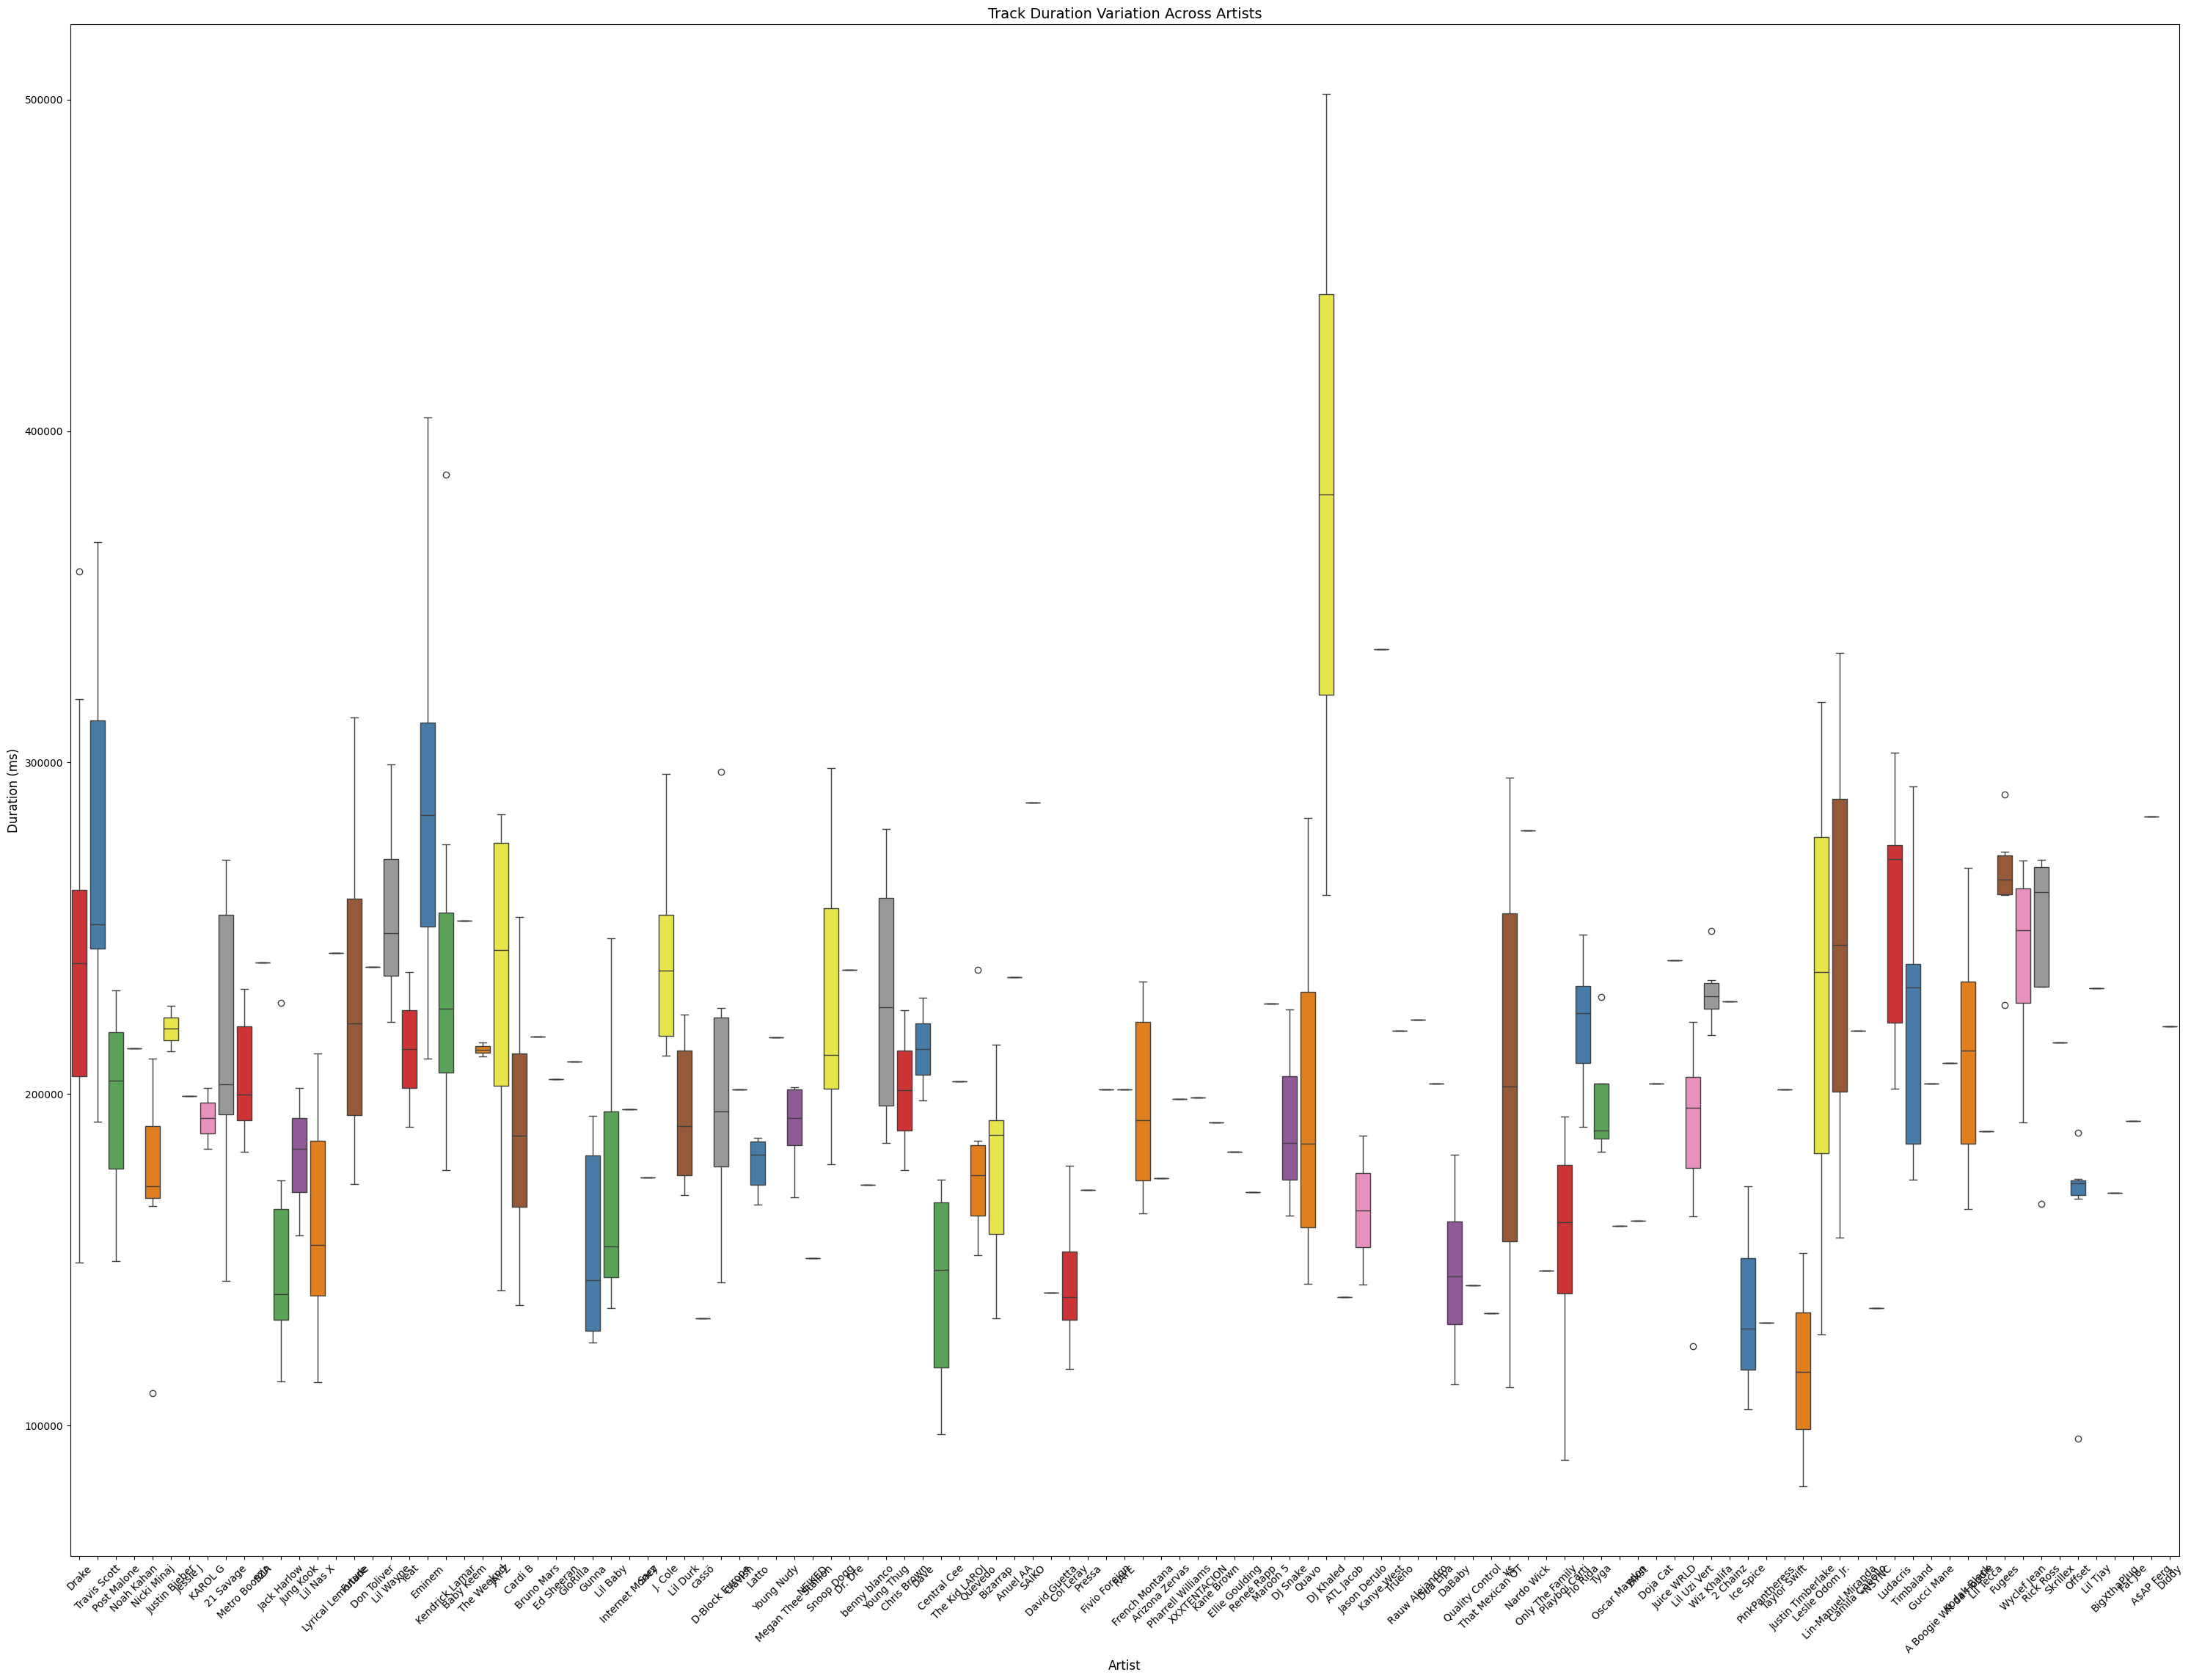

In [27]:
# 9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
# violin plot.

plt.figure(figsize=(30, 23))
sns.boxplot(x='Artist', y='Duration (ms)', data=df, palette='Set1')
plt.title('Track Duration Variation Across Artists', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Duration (ms)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

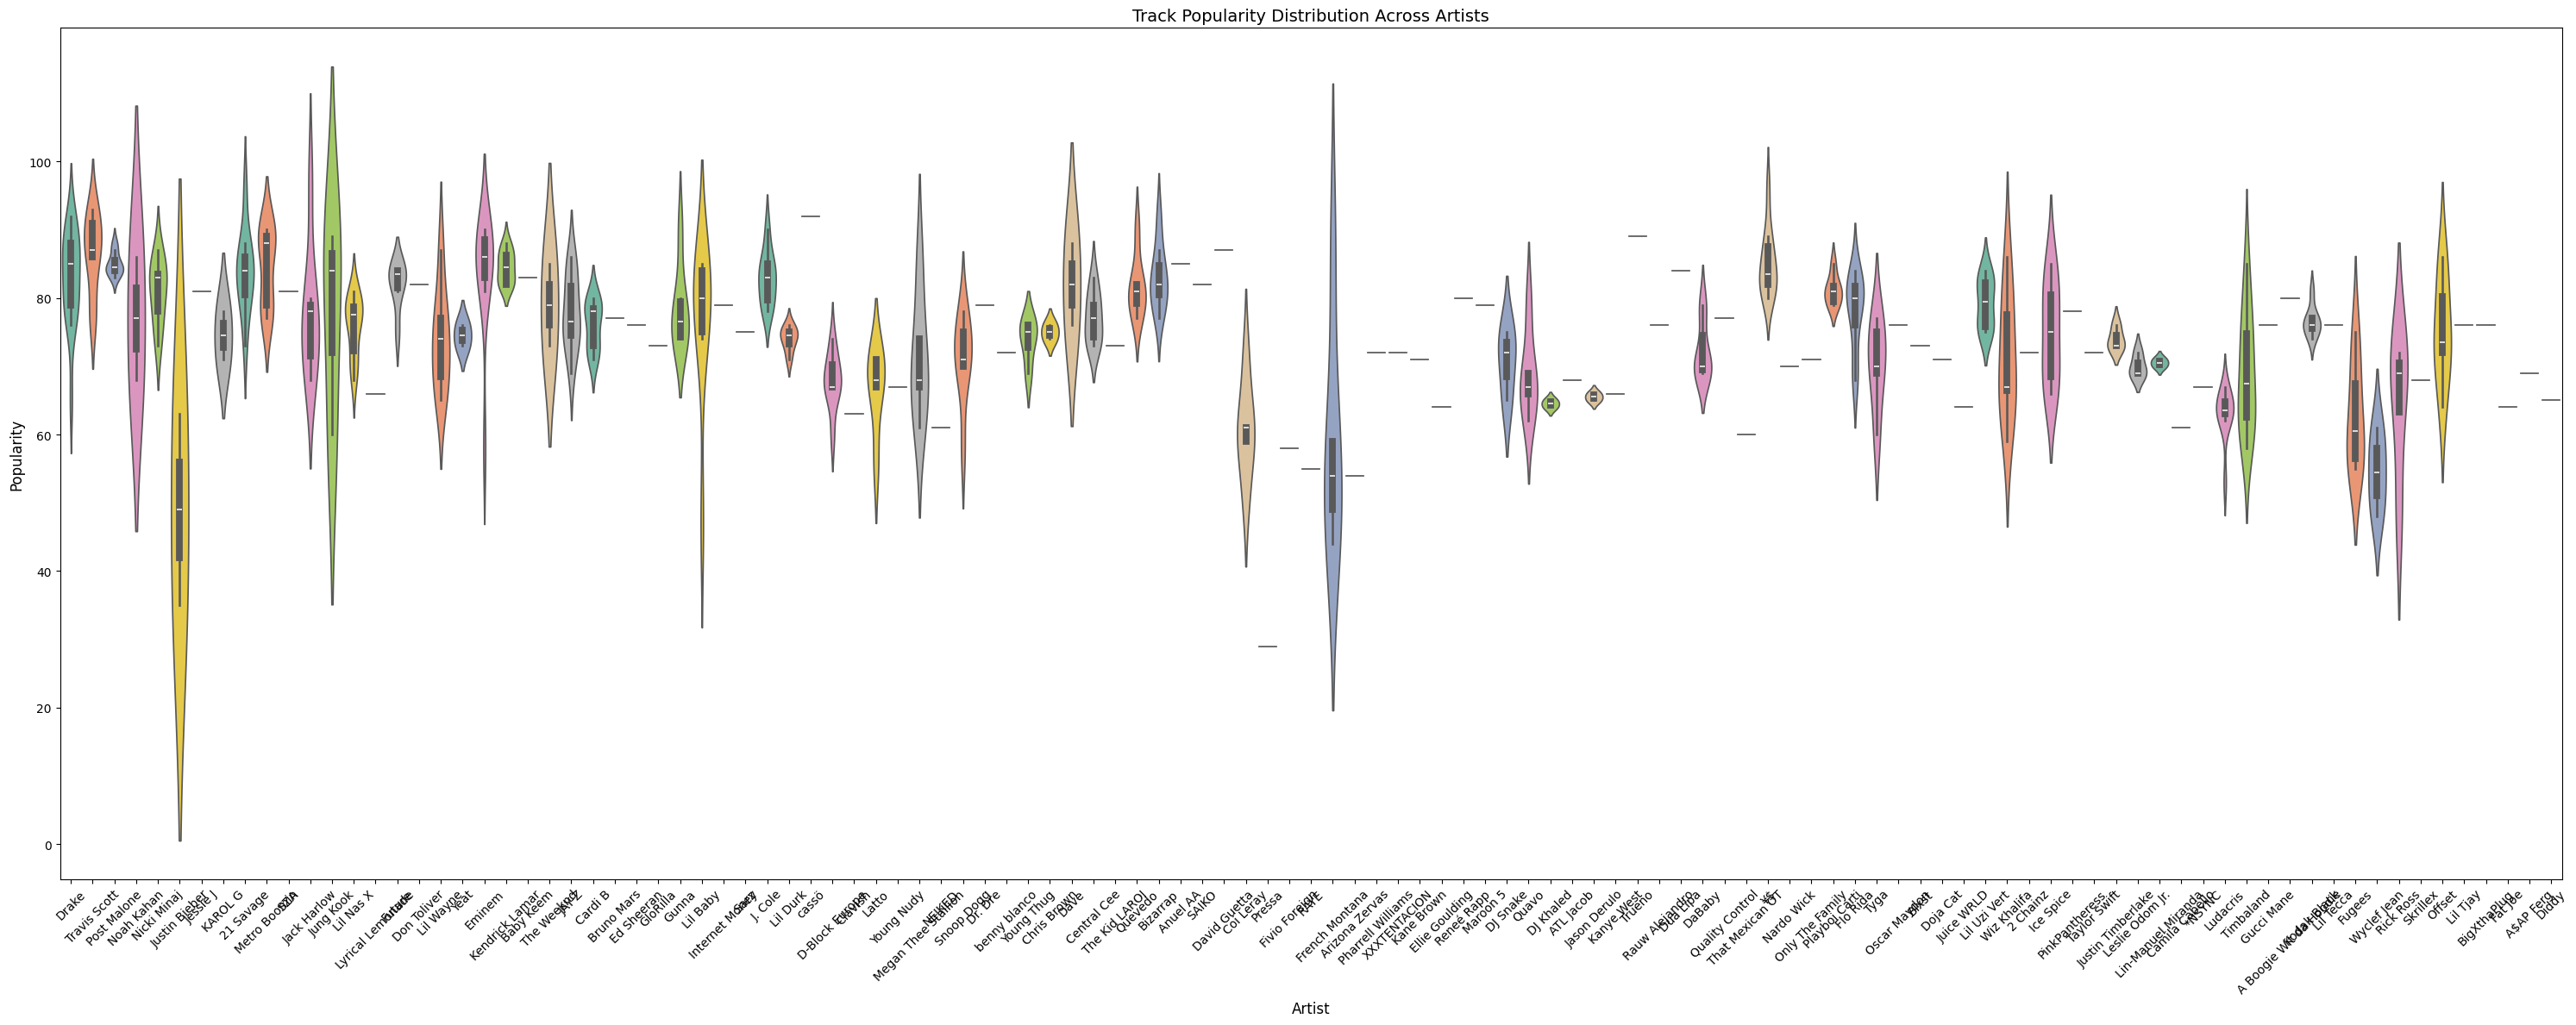

In [30]:
# 10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
# violin plot.

plt.figure(figsize=(30, 12))
sns.violinplot(x='Artist', y='Popularity', data=df, palette='Set2')
plt.title('Track Popularity Distribution Across Artists', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()